### Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import t

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

С интерсептом

In [ ]:
По формулам

In [3]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [4]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

Уравнение линейной регрессии имеет вид $y = 444.177 + 2.621 \cdot x$

In [25]:
y_pred = zp * 2.621 + 444.177

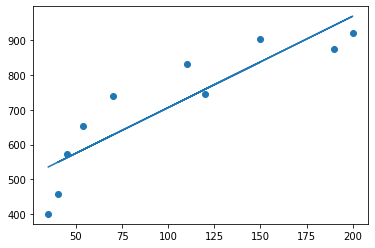

In [26]:
import matplotlib.pyplot as plt

plt.scatter(zp, ks)
plt.plot(zp, y_pred)
plt.show()

То же самое с помошью мартичных вычислений

In [24]:
X = np.hstack([np.ones((10,1)), zp.reshape((10, 1))])
y = ks.reshape((10, 1))
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
print(f'у = {round(B[0, 0],3)} + {round(B[1, 0],3)} * x')

у = 444.177 + 2.621 * x


Без интерсепта

In [27]:
b = np.mean(zp * ks) / np.mean(zp**2)
b

5.889820420132688

Уравнение линейной регрессии без интерсепта имеет вид $y = 5.89 \cdot x$

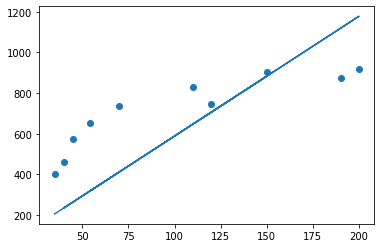

In [29]:
y_pred = zp * 5.89

plt.scatter(zp, ks)
plt.plot(zp, y_pred)
plt.show()

То же самое с помошью мартичных вычислений

In [30]:
X = zp.reshape((10, 1))
y = ks.reshape((10, 1))
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
print(f'у = {round(B[0, 0],3)} * x')

у = 5.89 * x


### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [46]:
def mse(b, x, y, n):
    return np.sum((b * x - y)**2) / n

In [47]:
alpha = 0.000001
b = 1
n = 10
inumb = 1000

In [48]:
for i in range(inumb):
    b = b - alpha * (2/n) * np.sum((b * zp - ks)*zp) 
    if not(i%(inumb//10)):
        print(f'b = {round(b, 3)}, mse = {round(mse(b, zp, ks, n), 3)}')

b = 1.135, mse = 368017.949
b = 5.599, mse = 57682.674
b = 5.872, mse = 56521.222
b = 5.889, mse = 56516.875
b = 5.89, mse = 56516.858
b = 5.89, mse = 56516.858
b = 5.89, mse = 56516.858
b = 5.89, mse = 56516.858
b = 5.89, mse = 56516.858
b = 5.89, mse = 56516.858


### Зачдача 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Если известно среднекватратичное отклонение генеральной совокупности, то используется таблица значенй функции Лапласа, если не известно, то таблица критических точек распределения Стьюдента, при этом в каечстве $\sigma$ используется среднекватратичное отклонение выборки

### Задача 4

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

MSE = $\frac 1n \sum{(a + bx - y)^2}$

$\frac{\partial {MSE}}{\partial b} = \frac 2n \sum{(a + bx - y)x}$

$\frac{\partial MSE}{\partial a} = \frac 2n \sum{(a + bx - y)}$

In [49]:
def mse(a, b, x, y, n):
    return np.sum((a + b * x - y)**2) / n

In [63]:
alpha = 0.00001
a = 0
b = 1
n = 10
inumb = 2000000

for i in range(inumb):
    err = a + b * zp - ks
    a -= alpha * (2/n) * np.sum(err) 
    b -= alpha * (2/n) * np.sum(err*zp) 
    
    if not(i%(inumb//10)):
        print(f'a = {round(a, 3)}, b = {round(b, 3)}, mse = {round(mse(a, b, zp, ks, n), 3)}')

a = 0.012, b = 2.347, mse = 229393.943
a = 283.157, b = 3.806, mse = 13047.322
a = 385.8, b = 3.05, mse = 7334.875
a = 423.013, b = 2.776, mse = 6584.038
a = 436.504, b = 2.677, mse = 6485.349
a = 441.396, b = 2.641, mse = 6472.377
a = 443.169, b = 2.628, mse = 6470.672
a = 443.812, b = 2.623, mse = 6470.448
a = 444.045, b = 2.622, mse = 6470.419
a = 444.129, b = 2.621, mse = 6470.415


### F-критерий Фишера

In [87]:
a = 444.129
b = 2.621
n = 10
r = b * np.std(zp) / np.std(ks)
r

0.8876462573960852

In [99]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.72088138760982

При 5 % уровне значимости и степенях свободы  k1=1  и  k2=10−2=8  табличное значение критерия:  Fкр=5.32 .

Так как  Fфакт=29.72>Fкр=5.32 , уравнение регрессии статистически значимо.

Второй способ расчета Fфакт

In [98]:
F_fact = ((a + b * zp - ks.mean())**2).sum()  / (((ks - (a + b * zp))**2).sum()/8)
F_fact

29.682080576514288